In [1]:
#from google.colab import drive

#if os.path.exists('/content/gdrive')==False:
#  drive.mount('/content/gdrive')
#  print('Google Drive is mounted\n')
#else:
#  print('Google Drive is already mounted\n')
  
#data = read_csv('/content/gdrive/My Drive/Colab Notebooks/project_data.csv', sep=',')

In [2]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv

In [3]:
data = pd.read_csv("project_data.csv")

C:\Users\user\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\user\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


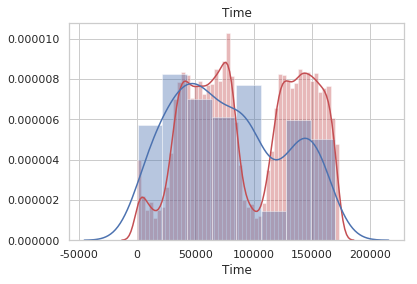

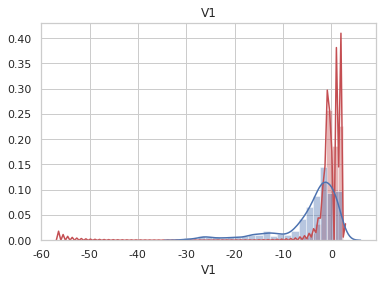

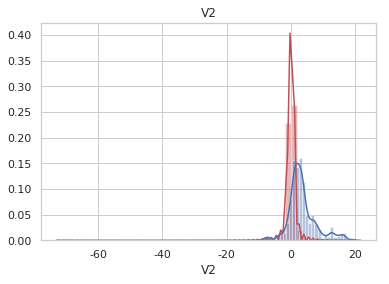

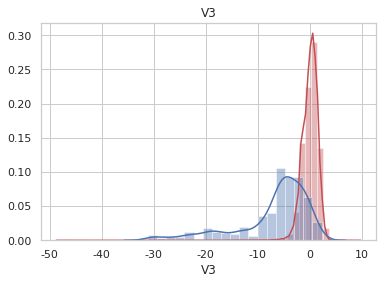

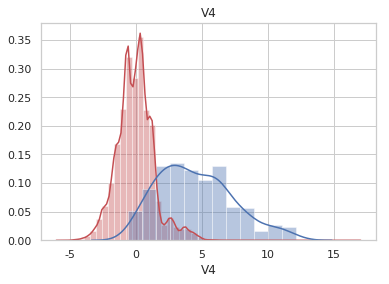

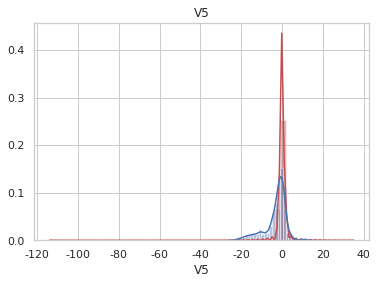

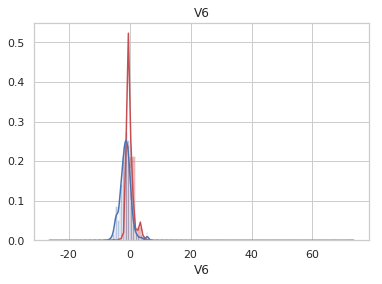

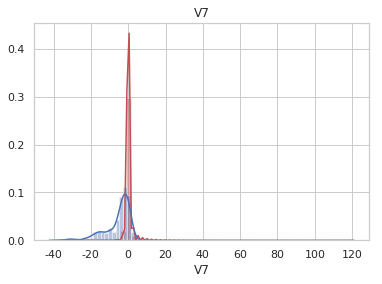

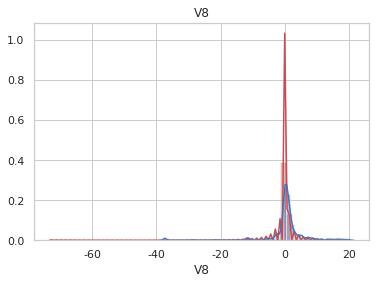

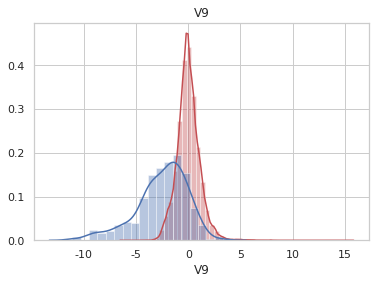

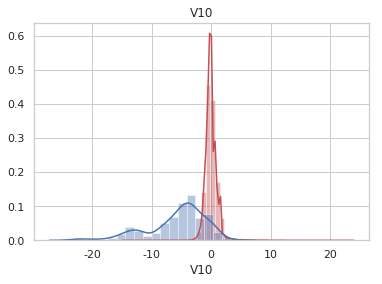

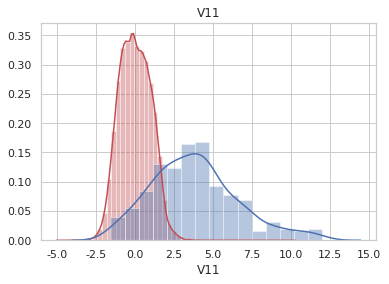

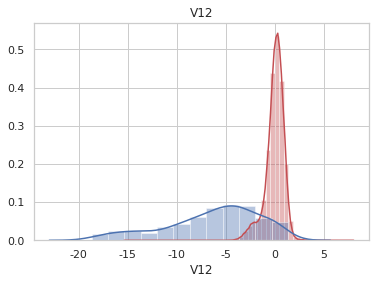

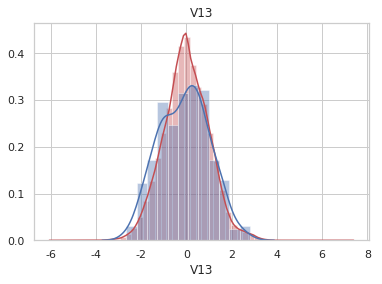

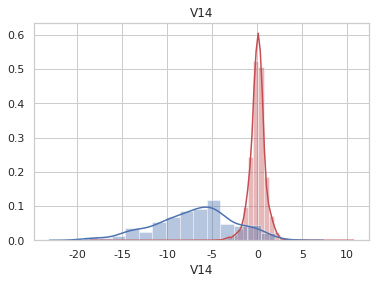

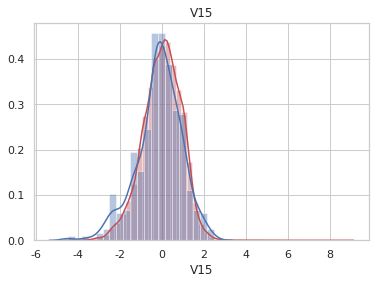

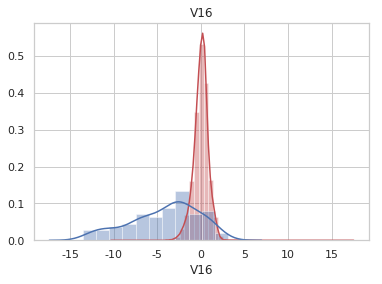

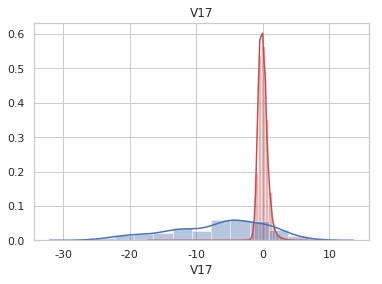

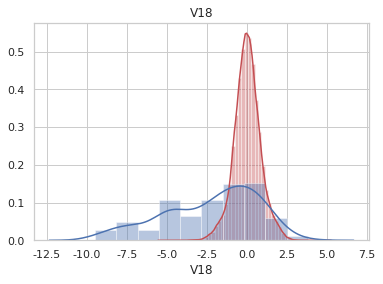

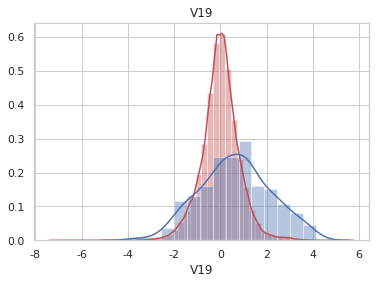

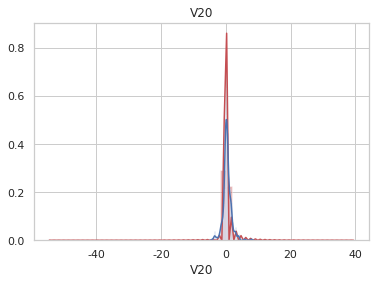

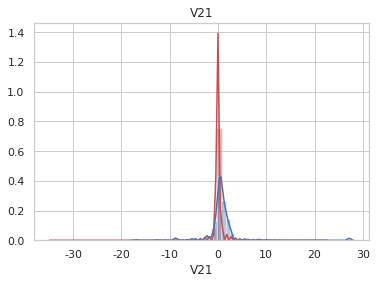

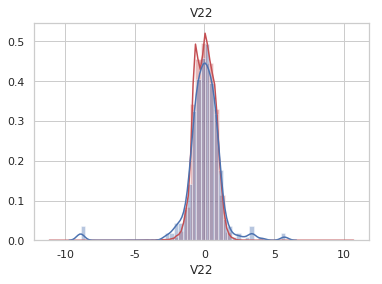

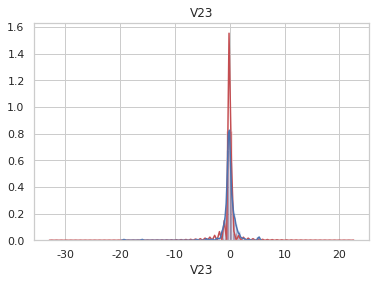

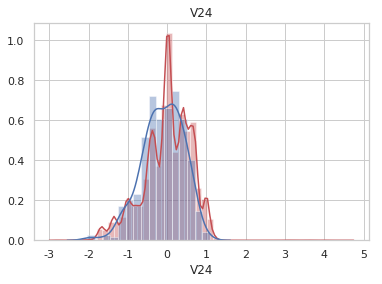

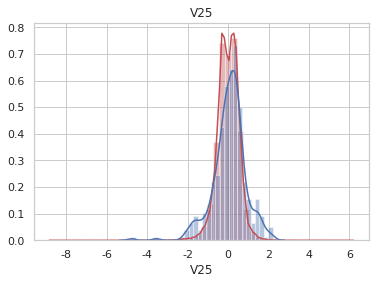

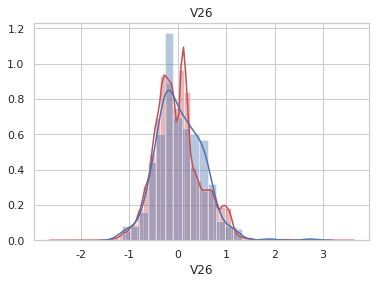

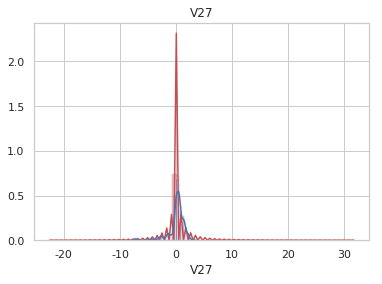

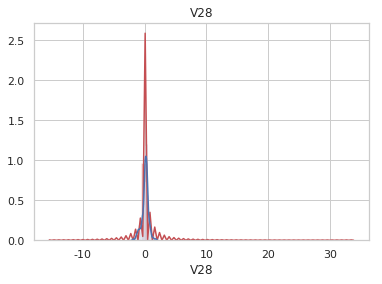

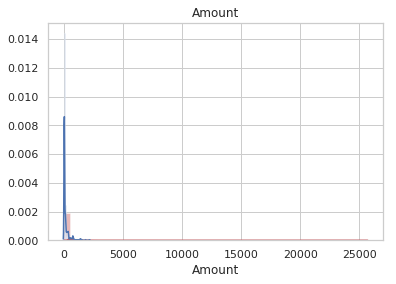

C:\Users\user\Miniconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Miniconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


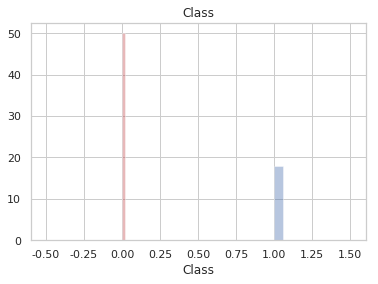

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

for col in data.columns:
    plt.title(col)
    sns.distplot(data[col][data['Class']==0], color='r', label='Not Fraud')
    sns.distplot(data[col][data['Class']==1], color='b', label='Fraud')
    plt.show()

위 그래프에서 fraud와 fraud가 아닌 것이 큰 차이가 나지 않는 column은 과감하게 제거하였습니다.

In [5]:
data.drop(labels=['Time', 'Amount', 'V1', 'V2', 'V5', 'V6', 'V7', 'V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1, inplace=True)

In [6]:
xy = np.array(data, dtype=np.float32)

In [7]:
x_data = xy[:, :-1]
y_data = xy[:, [-1]]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x_data, test_size=0.3, random_state=0)
y_train, y_test = train_test_split(y_data, test_size=0.3, random_state=0)

In [9]:
learning_rate = 0.1
num_iter = 50

tf.set_random_seed(555)

수업시간에 배운 선형 분류와 알고 있던 지식인 NN을 이용하여 문제를 해결하였습니다.

In [10]:
X = tf.placeholder(tf.float32, shape=[None, 11])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([11, 11]), name="weight")
b1 = tf.Variable(tf.random_normal([11]), name="bias")
H1 = tf.sigmoid(tf.matmul(X, W1)+b1)

#W2 = tf.Variable(tf.random_normal([11, 11]), name="weight")
#b2 = tf.Variable(tf.random_normal([11]), name="bias")
#H2 = tf.sigmoid(tf.matmul(H1, W2)+b2)

W3 = tf.Variable(tf.random_normal([11, 1]), name="weight")
b3 = tf.Variable(tf.random_normal([1]), name="bias")

hypothesis = tf.sigmoid(tf.matmul(H1, W3) + b3)
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

for step in range(num_iter):
    hy_val, cost_val, _ = sess.run([hypothesis, cost, train], feed_dict={X:x_train, Y:y_train})
    print(step, "Cost: ", cost_val)
        
_, hypo, _, predict, predicted_accuracy = sess.run([cost, hypothesis, train, predicted, accuracy], feed_dict = {X:x_train, Y:y_train})
print(predicted_accuracy)

Instructions for updating:
Colocations handled automatically by placer.
0 Cost:  0.73711014
1 Cost:  0.6576067
2 Cost:  0.58976406
3 Cost:  0.53173614
4 Cost:  0.48193675
5 Cost:  0.43902594
6 Cost:  0.4018848
7 Cost:  0.36958474
8 Cost:  0.34135854
9 Cost:  0.3165727
10 Cost:  0.2947042
11 Cost:  0.27532023
12 Cost:  0.25806186
13 Cost:  0.24263012
14 Cost:  0.22877544
15 Cost:  0.2162883
16 Cost:  0.20499225
17 Cost:  0.194738
18 Cost:  0.18539864
19 Cost:  0.17686592
20 Cost:  0.16904707
21 Cost:  0.16186224
22 Cost:  0.15524252
23 Cost:  0.14912811
24 Cost:  0.14346689
25 Cost:  0.13821353
26 Cost:  0.13332808
27 Cost:  0.12877557
28 Cost:  0.12452501
29 Cost:  0.120549105
30 Cost:  0.11682353
31 Cost:  0.11332672
32 Cost:  0.110039376
33 Cost:  0.10694421
34 Cost:  0.10402577
35 Cost:  0.10127013
36 Cost:  0.09866472
37 Cost:  0.096198246
38 Cost:  0.093860395
39 Cost:  0.09164191
40 Cost:  0.0895343
41 Cost:  0.087529846
42 Cost:  0.08562155
43 Cost:  0.08380299
44 Cost:  0.08206

score함수에 data 이름을 넣어주시면 accuracy가 측정됩니다.

In [11]:
def score(data_csv):
    data = pd.read_csv(data_csv)
    data.drop(labels=['Time', 'Amount', 'V1', 'V2', 'V5', 'V6', 'V7', 'V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1, inplace=True)
    xy = np.array(data, dtype=np.float32)
    x_data = xy[:, :-1]
    y_data = xy[:, [-1]]
    
    _, hypo, _, predict, test_accuracy = sess.run([cost, hypothesis, train, predicted, accuracy], feed_dict = {X:x_data, Y:y_data})
    print("Accuracy : ",test_accuracy)
    probability = np.ones((predict.shape[0], 2))
    for i in range(predict.shape[0]):
        if predict[i][0] == 1.0 :
            probability[i][0] = 1.0
            probability[i][1] = hypo[i][0]
        elif predict[i][0] == 0.0 :
            probability[i][0] = 0.0
            probability[i][1] = 1 - hypo[i][0]
            
    probability_rank = np.sort(probability, axis=0)[::-1]
    
    fraud_sum = 0
    fraud_cnt = 0
    
    normal_sum = 0
    normal_cnt = 0
    
    for i in range(predict.shape[0]):
        if (probability_rank[i][0] == 1.0):
            fraud_sum += (i + 1)
            fraud_cnt += 1
        elif (probability_rank[i][0] == 0.0):
            normal_sum += (i + 1)
            normal_cnt += 1
    
    print("fraud lable의 랭킹의 평균값 : ", fraud_sum / fraud_cnt)
    print("normal lable의 랭킹의 평균값 : ", normal_sum / normal_cnt)
    

In [12]:
score("project_data.csv")

Accuracy :  0.9963434
fraud lable의 랭킹의 평균값 :  197.0
normal lable의 랭킹의 평균값 :  99879.0
